In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from cycler import cycler
import matplotlib.cm as cm
# Set Dark2 as the default color cycle
dark2 = cm.get_cmap('Dark2').colors
plt.rcParams['axes.prop_cycle'] = cycler(color=dark2)
%matplotlib widget

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_23173/2383712382.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  dark2 = cm.get_cmap('Dark2').colors


In [2]:
# config = pd.read_hdf("../config/ATPC_Bi_ion.h5", "MC/configuration")
# config = pd.read_hdf("../config/ATPC_0nubb.h5", "MC/configuration")
# display(config)

In [3]:
parts = pd.read_hdf("../config/ATPC_Bi_ion.h5", "MC/particles")
# parts = pd.read_hdf("../config/ATPC_Bi.h5", "MC/particles")
# parts = pd.read_hdf("../config/ATPC_Tl.h5", "MC/particles")
# parts = pd.read_hdf("../config/ATPC_0nubb.h5", "MC/particles")
# parts = pd.read_hdf("../config/ATPC_Bi_nat_25bar.h5", "MC/particles")
parts = parts[parts.primary == 1]
# parts = parts[parts.particle_id == 1]
# parts = parts[parts.initial_z<0]
parts.describe()
print(parts.columns)

Index(['event_id', 'particle_id', 'particle_name', 'primary', 'mother_id',
       'initial_x', 'initial_y', 'initial_z', 'initial_t', 'final_x',
       'final_y', 'final_z', 'final_t', 'initial_volume', 'final_volume',
       'initial_momentum_x', 'initial_momentum_y', 'initial_momentum_z',
       'final_momentum_x', 'final_momentum_y', 'final_momentum_z',
       'kin_energy', 'length', 'creator_proc', 'final_proc'],
      dtype='object')


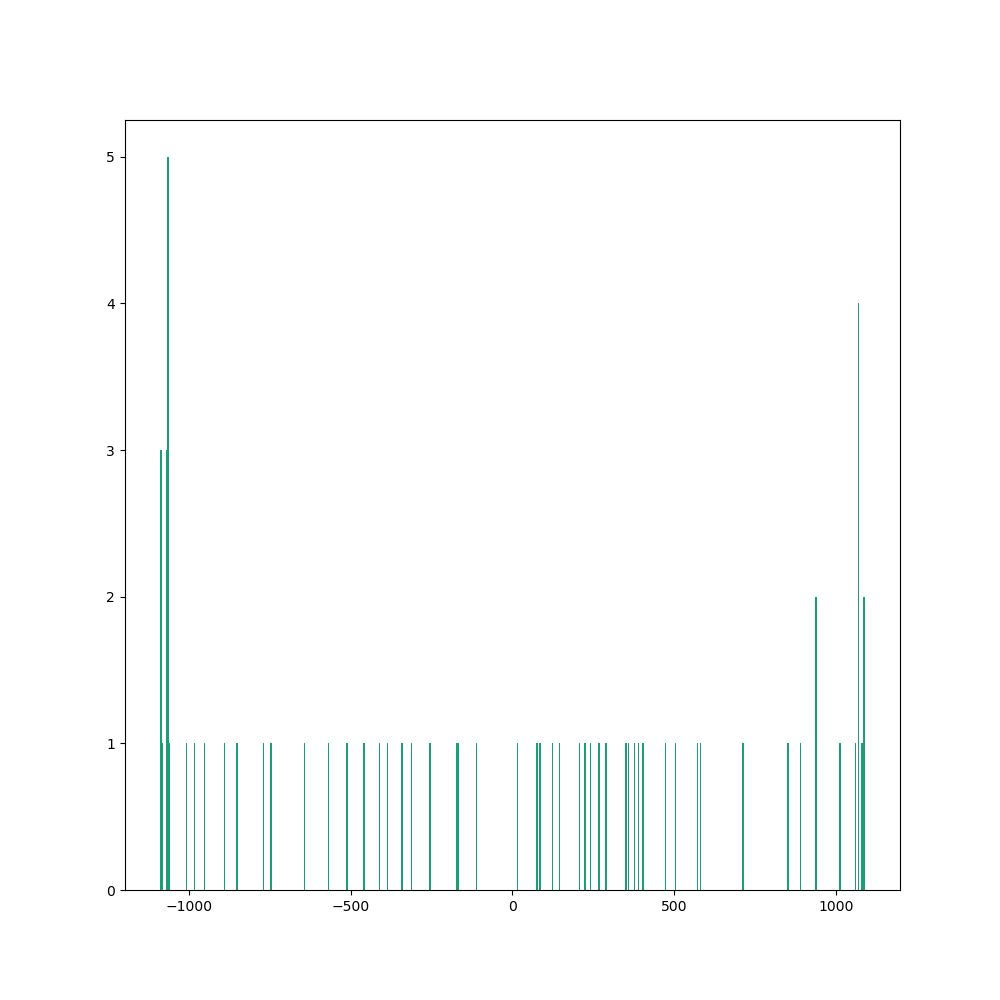

In [4]:
fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(parts.initial_x, parts.initial_y, parts.initial_z)
plt.hist(parts.initial_z, bins = 500);

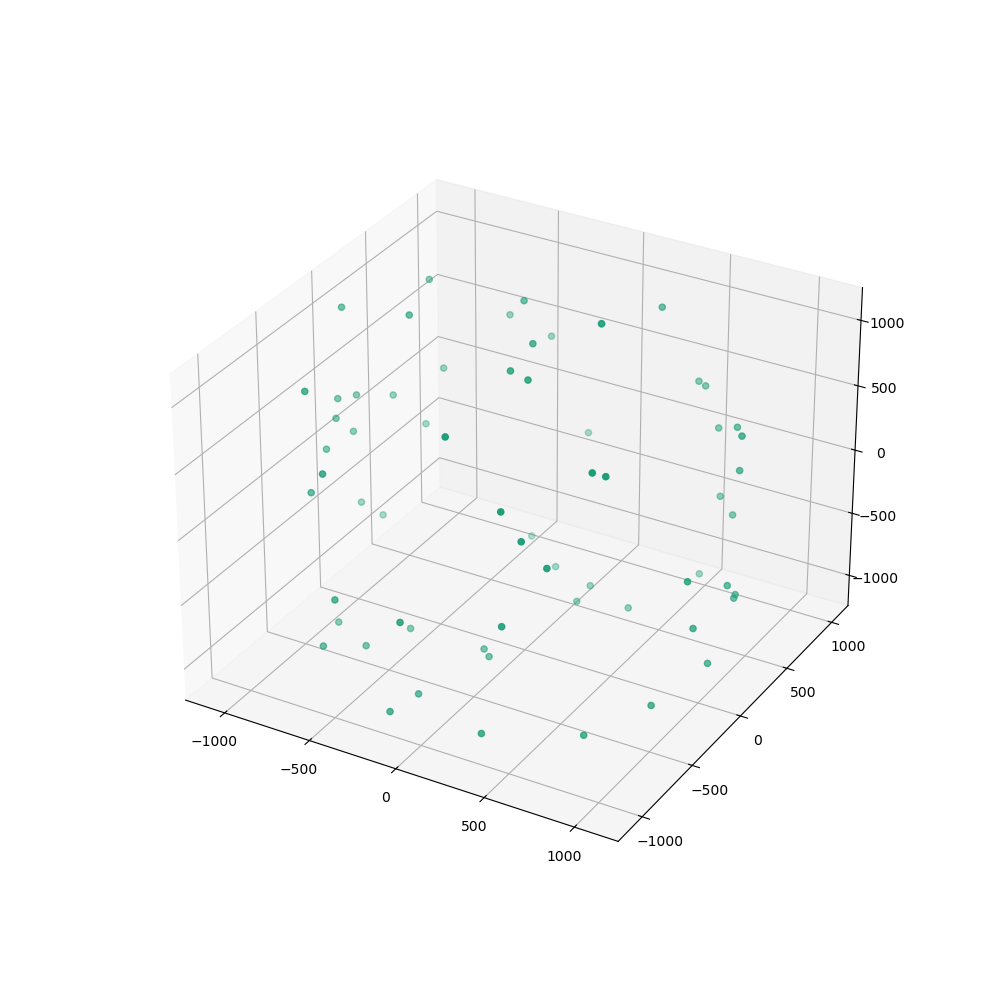

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
# parts = parts[parts.initial_z > 0]
ax.scatter(parts.initial_x, parts.initial_y, parts.initial_z)

In [6]:
hits = pd.read_hdf("../config/ATPC_0nubb.h5", "MC/hits")
hit_tot_energy = hits.groupby('event_id')['energy'].sum().reset_index(name='hit_tot_energy')
hit_tot_energy = hit_tot_energy[ (hit_tot_energy.hit_tot_energy > 2.433) & (hit_tot_energy.hit_tot_energy < 2.48) ]

parts_cut = parts[parts.event_id.isin(hit_tot_energy.event_id.unique())]
parts_cut['adjusted_max_abs'] = 3000 - parts_cut[['initial_x', 'initial_y', 'initial_z']].abs().max(axis=1)

parts['adjusted_max_abs'] = 3000 - parts[['initial_x', 'initial_y', 'initial_z']].abs().max(axis=1)

display(parts[['initial_x', 'initial_y', 'initial_z', 'adjusted_max_abs']])
display(parts_cut[['initial_x', 'initial_y', 'initial_z', 'adjusted_max_abs']])

print(len(parts['adjusted_max_abs']))

plt.figure()


# Define shared bin edges
bins = np.linspace(0,3000, 20)

# Compute histograms
counts1, edges = np.histogram(parts_cut['adjusted_max_abs'], bins=bins)
counts2, _     = np.histogram(parts['adjusted_max_abs'],     bins=bins)

# Avoid division by zero
with np.errstate(divide='ignore', invalid='ignore'):
    ratio = np.true_divide(counts1, counts2)
    ratio[~np.isfinite(ratio)] = 0  # set inf and NaN to 0

# Compute bin centers
bin_centers = 0.5 * (edges[:-1] + edges[1:])

# Plot
plt.plot(bin_centers, ratio, marker='o', linestyle='-')
plt.xlabel('Distance from wall [mm]')
plt.ylabel('Containment Efficiency')
plt.grid(True)
plt.show()


FileNotFoundError: File ../config/ATPC_0nubb.h5 does not exist

In [2]:
# table_1bar = pd.read_hdf("../data/NEXUSTrue/Bi_ion_files_1bar_merged.h5", "MC/E")
# table_5bar = pd.read_hdf("../data/NEXUSTrue/Bi_ion_files_5bar_merged.h5", "MC/E")
# table_10bar = pd.read_hdf("../data/NEXUSTrue/Bi_ion_files_10bar_merged.h5", "MC/E")
# table_15bar = pd.read_hdf("../data/NEXUSTrue/Bi_ion_files_15bar_merged.h5", "MC/E")
# table_25bar = pd.read_hdf("../data/NEXUSTrue/Bi_ion_files_25bar_merged.h5", "MC/E")

# table_1bar = pd.read_hdf("../data/GammaTables/GammaTable_Bi_ion_1bar_merged.h5", "MC/E")
# table_5bar = pd.read_hdf("../data/GammaTables/GammaTable_Bi_ion_5bar_merged.h5", "MC/E")
# table_10bar = pd.read_hdf("../data/GammaTables/GammaTable_Bi_ion_10bar_merged.h5", "MC/E")
# table_15bar = pd.read_hdf("../data/GammaTables/GammaTable_Bi_ion_15bar_merged.h5", "MC/E")
# table_25bar = pd.read_hdf("../data/GammaTables/GammaTable_Bi_ion_25bar_merged.h5", "MC/E")

table_1bar = pd.read_hdf("../data/GammaTables/GammaTable_Tl_ion_1bar_merged.h5", "MC/E")
table_5bar = pd.read_hdf("../data/GammaTables/GammaTable_Tl_ion_5bar_merged.h5", "MC/E")
table_10bar = pd.read_hdf("../data/GammaTables/GammaTable_Tl_ion_10bar_merged.h5", "MC/E")
table_15bar = pd.read_hdf("../data/GammaTables/GammaTable_Tl_ion_15bar_merged.h5", "MC/E")
table_25bar = pd.read_hdf("../data/GammaTables/GammaTable_Tl_ion_25bar_merged.h5", "MC/E")

table_1bar["R"] = np.sqrt(table_1bar.initial_x*table_1bar.initial_x + table_1bar.initial_y*table_1bar.initial_y)
table_5bar["R"] = np.sqrt(table_5bar.initial_x*table_5bar.initial_x + table_5bar.initial_y*table_5bar.initial_y)
table_10bar["R"] = np.sqrt(table_10bar.initial_x*table_10bar.initial_x + table_10bar.initial_y*table_10bar.initial_y)
table_15bar["R"] = np.sqrt(table_15bar.initial_x*table_15bar.initial_x + table_15bar.initial_y*table_15bar.initial_y)
table_25bar["R"] = np.sqrt(table_25bar.initial_x*table_25bar.initial_x + table_25bar.initial_y*table_25bar.initial_y)


# table_5bar["initial_x"] = np.abs(table_5bar["initial_x"]) - 3508/2.0
# table_25bar["initial_x"] = np.abs(table_25bar["initial_x"]) - 2052/2.0

# table_5bar["initial_x"] = np.abs(table_5bar["initial_x"]) 
# table_25bar["initial_x"] = np.abs(table_25bar["initial_x"])

# table_5bar.describe()
table_25bar.describe()

# print(len(table_5bar), len(table_10bar), len(table_15bar), len(table_25bar))

,event_id,energy,mother_E,initial_x,initial_y,initial_z,final_x,final_y,final_z,R
count,1.510776e+06,1.510776e+06,1.510776e+06,1.510776e+06,1.510776e+06,1.510776e+06,1.510776e+06,1.510776e+06,1.510776e+06,1.510776e+06
mean,7.502642e+07,2.418769e+00,2.607632e+00,-1.129797e-01,-1.652846e-01,-1.064198e+01,-1.016544e-01,9.620222e-03,-5.958462e+00,9.421505e+02
std,4.331497e+07,8.376837e-02,1.133566e-01,6.865887e+02,6.864360e+02,7.723220e+02,5.587320e+02,5.590093e+02,6.445783e+02,2.344146e+02
min,5.000000e+04,2.300000e+00,3.649712e-01,-1.097000e+03,-1.097000e+03,-1.097000e+03,-1.057000e+03,-1.057000e+03,-1.058000e+03,1.000000e+00
25%,3.750039e+07,2.347159e+00,2.614504e+00,-6.170000e+02,-6.160000e+02,-7.480000e+02,-4.670000e+02,-4.680000e+02,-5.890000e+02,8.991802e+02
50%,7.505002e+07,2.401958e+00,2.614504e+00,0.000000e+00,-1.000000e+00,-1.400000e+01,-1.000000e+00,0.000000e+00,-9.000000e+00,1.061803e+03
75%,1.125503e+08,2.484091e+00,2.614504e+00,6.170000e+02,6.160000e+02,7.160000e+02,4.670000e+02,4.680000e+02,5.750000e+02,1.072465e+03
max,1.500005e+08,2.600000e+00,3.961122e+00,1.097000e+03,1.097000e+03,1.097000e+03,1.057000e+03,1.057000e+03,1.058000e+03,1.097570e+03


[]

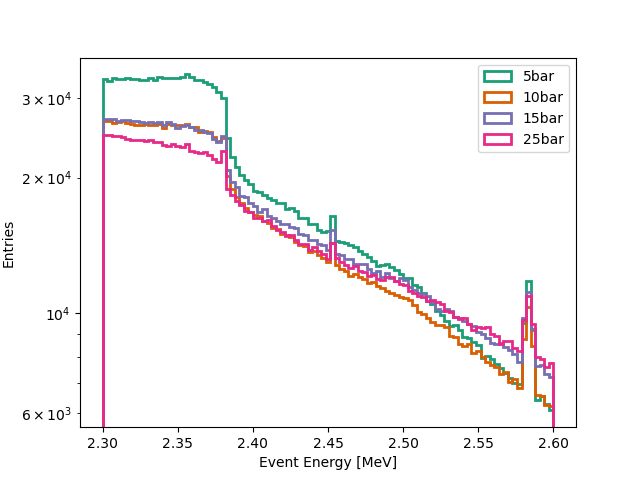

In [8]:
plt.figure()

plt.hist(table_5bar.energy,  histtype="step", bins = np.linspace(2.3,2.6,100), label = "5bar",  linewidth=2, density = False);
plt.hist(table_10bar.energy, histtype="step", bins = np.linspace(2.3,2.6,100), label = "10bar", linewidth=2, density = False);
plt.hist(table_15bar.energy, histtype="step", bins = np.linspace(2.3,2.6,100), label = "15bar", linewidth=2, density = False);
plt.hist(table_25bar.energy, histtype="step", bins = np.linspace(2.3,2.6,100), label = "25bar", linewidth=2, density = False);
plt.legend()
plt.xlabel("Event Energy [MeV]")
plt.ylabel("Entries")
plt.semilogy()


Text(0, 0.5, 'Entries')

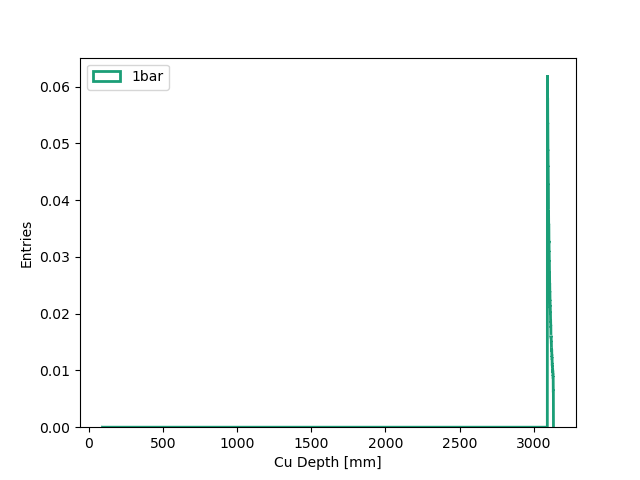

In [9]:
plt.figure()

plt.hist(table_1bar[(table_1bar.initial_z > -2000) & (table_1bar.initial_z < 2000)].R, histtype="step",  bins = 5000, label = "1bar", linewidth=2, density=True);
# plt.hist(table_5bar[(table_5bar.initial_z > -600) & (table_5bar.initial_z < 600)].R , histtype="step",  bins = 100, label = "5bar", linewidth=2, density=True);
# plt.hist(table_10bar[(table_10bar.initial_z > -600) & (table_10bar.initial_z < 600)].R, histtype="step",  bins = 100, label = "10bar", linewidth=2, density=True);
# plt.hist(table_15bar[(table_15bar.initial_z > -600) & (table_15bar.initial_z < 600)].R, histtype="step",  bins = 100, label = "15bar", linewidth=2, density=True);
# plt.hist(table_25bar[(table_25bar.initial_z > -600) & (table_25bar.initial_z < 600)].R, histtype="step",  bins = 100, label = "25bar", linewidth=2, density=True);
plt.legend()
plt.xlabel("Cu Depth [mm]")
plt.ylabel("Entries")

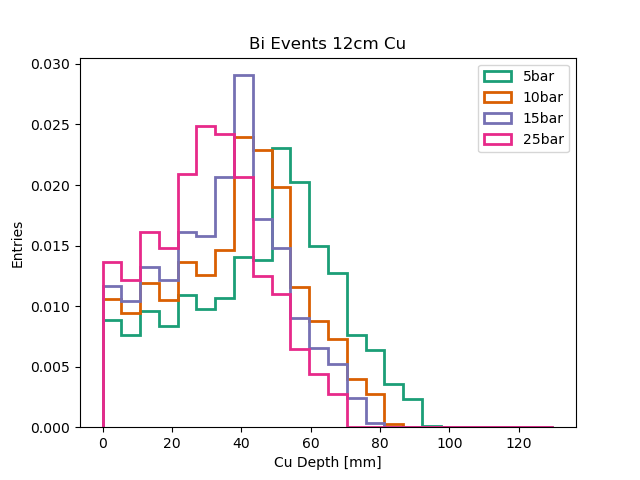

In [10]:
plt.figure()

# plt.hist(np.abs(table_1bar.initial_x) - 6000/2.0 , histtype="step",  bins = np.linspace(0, 130, 25), label = "1bar", linewidth=2, density=True);
plt.hist(np.abs(table_5bar.initial_x) - 3508/2.0 , histtype="step",  bins = np.linspace(0, 130, 25), label = "5bar", linewidth=2, density=True);
plt.hist(np.abs(table_10bar.initial_x) - 2784/2.0, histtype="step",  bins = np.linspace(0, 130, 25), label = "10bar", linewidth=2, density=True);
plt.hist(np.abs(table_15bar.initial_x) - 2432/2.0, histtype="step",  bins = np.linspace(0, 130, 25), label = "15bar", linewidth=2, density=True);
plt.hist(np.abs(table_25bar.initial_x) - 2052/2.0, histtype="step",  bins = np.linspace(0, 130, 25), label = "25bar", linewidth=2, density=True);
# plt.hist(table_25bar.initial_x, histtype="step",  bins = 500, label = "25bar", linewidth=2, density=True);
plt.legend()
plt.xlabel("Cu Depth [mm]")
plt.ylabel("Entries")
plt.title("Bi Events 12cm Cu")
# plt.semilogy()
plt.savefig(f"plots/Technote/CuDepth.png", dpi=500)

Copper Mass: 65384.54852257698 201251.75255854861
[1.02527221 1.17517831 1.17850637 1.17143285 1.18809614]
[1.0814906  1.17632346 1.16017358 1.18496398 1.16662525]
[1.1738224  1.18821555 1.18786091 1.19716241 1.22890104]
[1.15989518 1.18407461 1.18280551 1.20036884 1.21706162]


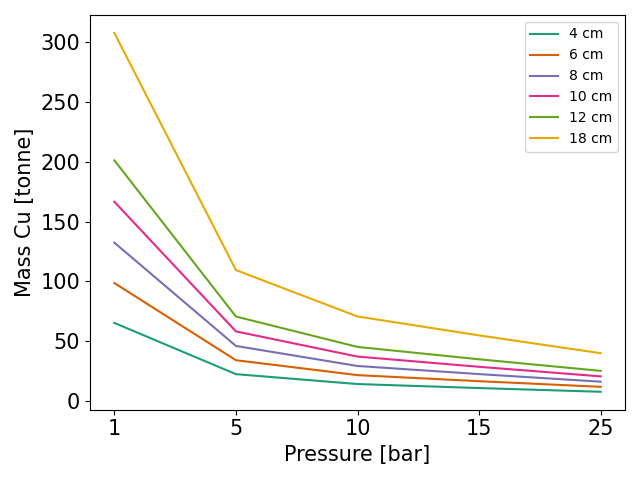

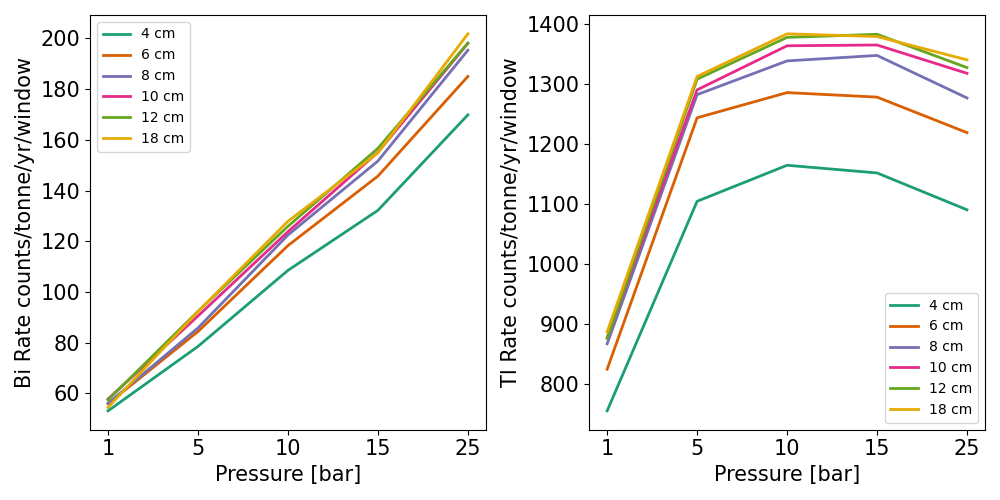

In [18]:
def CalcMassCube(det_size, thick):
    rho_Cu   = 8960 # kg/m^3
    return rho_Cu * ( (det_size+2*thick)**3 - det_size**3 )

def CalcMassCylinder(det_size, thick):
    rho_Cu   = 8960 # kg/m^3x
    return np.pi*0.25*rho_Cu * ( (det_size+2*thick)**3 - det_size**3 )

# These are for 12 cm Cu with ciube geom
# Int_Win_Bi = np.array([79, 329, 697, 1096, 1918])
# Detsize = np.array([6.000, 3.508, 2.784, 2.432, 2.052])
# MCu = CalcMassCube(Detsize, 12e-2)

# Bismuth events
Int_Win_Bi_4cm = np.array([2015, 8634, 18821, 29927, 53760]) 
Int_Win_Bi_4cm_err = np.sqrt(Int_Win_Bi_4cm)

Int_Win_Bi_6cm = np.array([1406, 6119, 13490, 21645, 38319])
Int_Win_Bi_6cm_err = np.sqrt(Int_Win_Bi_6cm)

Int_Win_Bi_8cm = np.array([1050, 4615, 10331, 16634, 29788]) 
Int_Win_Bi_8cm_err = np.sqrt(Int_Win_Bi_8cm)

Int_Win_Bi_10cm = np.array([860, 3853, 8241, 13399, 23722]) 
Int_Win_Bi_10cm_err = np.sqrt(Int_Win_Bi_10cm)

Int_Win_Bi_12cm = np.array([708, 3241, 6891, 11105, 19419])
Int_Win_Bi_12cm_err = np.sqrt(Int_Win_Bi_12cm)

Int_Win_Bi_18cm = np.array([439, 2090, 4482, 6990, 12490]) 
Int_Win_Bi_18cm_err = np.sqrt(Int_Win_Bi_18cm)


# Thalium events
Int_Win_Tl_4cm = np.array([8367, 35440, 58943, 76096, 100729]) 
Int_Win_Tl_4cm_err = np.sqrt(Int_Win_Tl_4cm)

Int_Win_Tl_6cm = np.array([6051, 26310, 42784, 55411, 73677]) 
Int_Win_Tl_6cm_err = np.sqrt(Int_Win_Tl_6cm)

Int_Win_Tl_8cm = np.array([4740, 20123, 32950, 43134, 56813]) 
Int_Win_Tl_8cm_err = np.sqrt(Int_Win_Tl_8cm)

Int_Win_Tl_10cm = np.array([3812, 16023, 26492, 34412, 46055]) 
Int_Win_Tl_10cm_err = np.sqrt(Int_Win_Tl_10cm)

Int_Win_Tl_12cm = np.array([3153, 13391, 22002, 28604, 37958]) 
Int_Win_Tl_12cm_err = np.sqrt(Int_Win_Tl_12cm)

Int_Win_Tl_18cm = np.array([2087, 8674, 14148, 18164, 24206]) 
Int_Win_Tl_18cm_err = np.sqrt(Int_Win_Tl_18cm)


Detsize = np.array([6.182, 3.615, 2.870, 2.507, 2.114])
MCu_3cm = CalcMassCylinder(Detsize,  3e-2) 
MCu_4cm = CalcMassCylinder(Detsize,  4e-2) 
MCu_5cm = CalcMassCylinder(Detsize,  5e-2) 
MCu_6cm = CalcMassCylinder(Detsize,  6e-2) 
MCu_8cm = CalcMassCylinder(Detsize,  8e-2) 
MCu_10cm = CalcMassCylinder(Detsize,  10e-2) 
MCu_12cm = CalcMassCylinder(Detsize, 12e-2)
MCu_16cm = CalcMassCylinder(Detsize, 16e-2)
MCu_18cm = CalcMassCylinder(Detsize, 18e-2) 


print("Copper Mass:", MCu_4cm[0], MCu_12cm[0])

plt.figure()


pressures_label = ["1", "5", "10", "15", "25"]
plt.plot(pressures_label, MCu_4cm/1000, label = "4 cm")
plt.plot(pressures_label, MCu_6cm/1000, label = "6 cm")
plt.plot(pressures_label, MCu_8cm/1000, label = "8 cm")
plt.plot(pressures_label, MCu_10cm/1000, label = "10 cm")
plt.plot(pressures_label, MCu_12cm/1000, label = "12 cm")
plt.plot(pressures_label, MCu_18cm/1000, label = "18 cm")
plt.xlabel("Pressure [bar]", fontsize=15)
plt.ylabel("Mass Cu [tonne]", fontsize=15)
plt.legend()
plt.tick_params(axis='both', which='both', labelsize=15)
plt.tight_layout()
plt.savefig(f"plots/Technote/CuMassvsThick.png", dpi=500)


fig = plt.figure(figsize=(10,5));

plt.subplot(121);
pressures_label = ["1", "5", "10", "15", "25"]
plt.plot(pressures_label, 1.28e-6 * (Int_Win_Bi_4cm /1e8) * 3.15e7 *  MCu_4cm, linewidth = 2, label = "4 cm")
plt.plot(pressures_label, 1.28e-6 * (Int_Win_Bi_6cm /1e8) * 3.15e7 *  MCu_6cm, linewidth = 2, label = "6 cm")
plt.plot(pressures_label, 1.28e-6 * (Int_Win_Bi_8cm /1e8) * 3.15e7 *  MCu_8cm, linewidth = 2, label = "8 cm")
plt.plot(pressures_label, 1.28e-6 * (Int_Win_Bi_10cm /1e8) * 3.15e7 *  MCu_10cm, linewidth = 2, label = "10 cm")
plt.plot(pressures_label, 1.28e-6 * (Int_Win_Bi_12cm /1e8) * 3.15e7 *  MCu_12cm, linewidth = 2, label = "12 cm")
plt.plot(pressures_label, 1.28e-6 * (Int_Win_Bi_18cm /1e8) * 3.15e7 *  MCu_18cm, linewidth = 2, label = "18 cm")
plt.xlabel("Pressure [bar]", fontsize=15)
plt.ylabel("Bi Rate counts/tonne/yr/window", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.tight_layout()
print( (Int_Win_Bi_18cm *  MCu_18cm) / (Int_Win_Bi_4cm *  MCu_4cm))
print( (Int_Win_Bi_12cm *  MCu_12cm) / (Int_Win_Bi_4cm *  MCu_4cm))


plt.subplot(122);
pressures_label = ["1", "5", "10", "15", "25"]
plt.plot(pressures_label, 35.94e-2 * 1.22e-6 * (Int_Win_Tl_4cm /1e7) * 3.15e7 *  MCu_4cm, linewidth = 2, label = "4 cm")
plt.plot(pressures_label, 35.94e-2 * 1.22e-6 * (Int_Win_Tl_6cm /1e7) * 3.15e7 *  MCu_6cm, linewidth = 2, label = "6 cm")
plt.plot(pressures_label, 35.94e-2 * 1.22e-6 * (Int_Win_Tl_8cm /1e7) * 3.15e7 *  MCu_8cm, linewidth = 2, label = "8 cm")
plt.plot(pressures_label, 35.94e-2 * 1.22e-6 * (Int_Win_Tl_10cm /1e7) * 3.15e7 *  MCu_10cm, linewidth = 2, label = "10 cm")
plt.plot(pressures_label, 35.94e-2 * 1.22e-6 * (Int_Win_Tl_12cm/1e7) * 3.15e7 *  MCu_12cm, linewidth = 2, label = "12 cm")
plt.plot(pressures_label, 35.94e-2 * 1.22e-6 * (Int_Win_Tl_18cm/1e7) * 3.15e7 *  MCu_18cm, linewidth = 2, label = "18 cm")
plt.xlabel("Pressure [bar]", fontsize=15)
plt.ylabel("Tl Rate counts/tonne/yr/window", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.tight_layout()

print( (Int_Win_Tl_18cm *  MCu_18cm) / (Int_Win_Tl_4cm *  MCu_4cm))
print( (Int_Win_Tl_12cm *  MCu_12cm) / (Int_Win_Tl_4cm *  MCu_4cm))


plt.savefig(f"plots/Technote/RateCuMassvsThick.png", dpi=500)


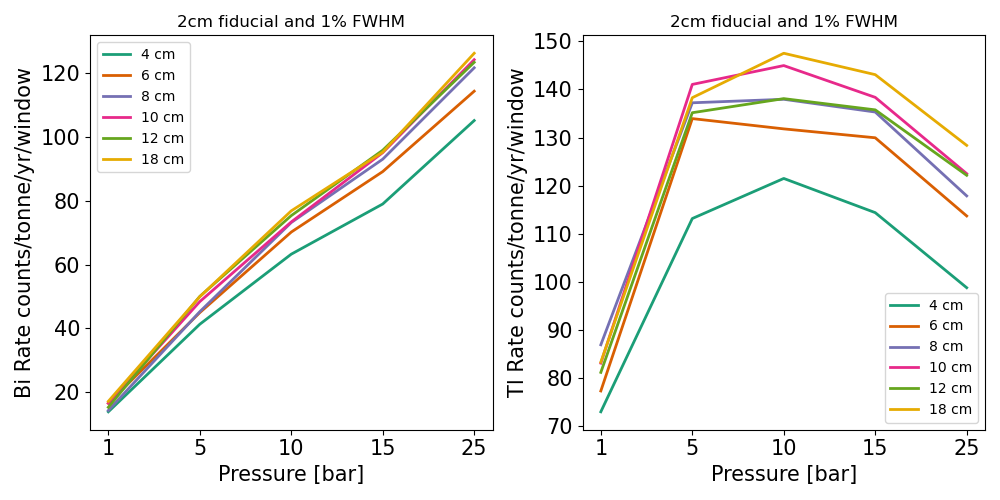

In [12]:
# Bismuth events
Int_Win_Bi_4cm_cont = np.array([525, 4541, 10976, 17890, 33299]) 
Int_Win_Bi_4cm_err_cont = np.sqrt(Int_Win_Bi_4cm_cont)

Int_Win_Bi_6cm_cont = np.array([415, 3259, 8008, 13251, 23697])
Int_Win_Bi_6cm_err_cont = np.sqrt(Int_Win_Bi_6cm_cont)

Int_Win_Bi_8cm_cont = np.array([267, 2433, 6177, 10211, 18566]) 
Int_Win_Bi_8cm_err_cont = np.sqrt(Int_Win_Bi_8cm_cont)

Int_Win_Bi_10cm_cont = np.array([246, 2060, 4886, 8219, 14887]) 
Int_Win_Bi_10cm_err_cont = np.sqrt(Int_Win_Bi_10cm_cont)

Int_Win_Bi_12cm_cont = np.array([188, 1755, 4126, 6798, 12101])
Int_Win_Bi_12cm_err_cont = np.sqrt(Int_Win_Bi_12cm_cont)

Int_Win_Bi_18cm_cont = np.array([138, 1131, 2694, 4301, 7818]) 
Int_Win_Bi_18cm_err_cont = np.sqrt(Int_Win_Bi_18cm_cont)

# Thalium events
Int_Win_Tl_4cm_cont = np.array([808, 3631, 6150, 7558, 9125]) 
Int_Win_Tl_4cm_err_cont = np.sqrt(Int_Win_Tl_4cm_cont)

Int_Win_Tl_6cm_cont = np.array([567, 2834, 4387, 5635, 6873]) 
Int_Win_Tl_6cm_err_cont = np.sqrt(Int_Win_Tl_6cm_cont)

Int_Win_Tl_8cm_cont = np.array([475, 2154, 3397, 4332, 5246]) 
Int_Win_Tl_8cm_err_cont = np.sqrt(Int_Win_Tl_8cm_cont)

Int_Win_Tl_10cm_cont = np.array([361, 1752, 2817, 3489, 4282]) 
Int_Win_Tl_10cm_err_cont = np.sqrt(Int_Win_Tl_10cm_cont)

Int_Win_Tl_12cm_cont = np.array([292, 1384, 2206, 2809, 3494]) 
Int_Win_Tl_12cm_err_cont = np.sqrt(Int_Win_Tl_12cm_cont)

Int_Win_Tl_18cm_cont = np.array([196, 914, 1509, 1885, 2319]) 
Int_Win_Tl_18cm_err_cont = np.sqrt(Int_Win_Tl_18cm_cont)

fig = plt.figure(figsize=(10,5));

plt.subplot(121);
pressures_label = ["1", "5", "10", "15", "25"]
plt.plot(pressures_label, 1.28e-6 * (Int_Win_Bi_4cm_cont /1e8) * 3.15e7 *  MCu_4cm, linewidth = 2, label = "4 cm")
plt.plot(pressures_label, 1.28e-6 * (Int_Win_Bi_6cm_cont /1e8) * 3.15e7 *  MCu_6cm, linewidth = 2, label = "6 cm")
plt.plot(pressures_label, 1.28e-6 * (Int_Win_Bi_8cm_cont /1e8) * 3.15e7 *  MCu_8cm, linewidth = 2, label = "8 cm")
plt.plot(pressures_label, 1.28e-6 * (Int_Win_Bi_10cm_cont /1e8) * 3.15e7 *  MCu_10cm, linewidth = 2, label = "10 cm")
plt.plot(pressures_label, 1.28e-6 * (Int_Win_Bi_12cm_cont /1e8) * 3.15e7 *  MCu_12cm, linewidth = 2, label = "12 cm")
plt.plot(pressures_label, 1.28e-6 * (Int_Win_Bi_18cm_cont /1e8) * 3.15e7 *  MCu_18cm, linewidth = 2, label = "18 cm")
plt.xlabel("Pressure [bar]", fontsize=15)
plt.ylabel("Bi Rate counts/tonne/yr/window", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.title("2cm fiducial and 1% FWHM")
plt.tight_layout()

plt.subplot(122);
pressures_label = ["1", "5", "10", "15", "25"]
plt.plot(pressures_label, 35.94e-2 * 1.22e-6 * (Int_Win_Tl_4cm_cont /1e7) * 3.15e7 *  MCu_4cm, linewidth = 2, label = "4 cm")
plt.plot(pressures_label, 35.94e-2 * 1.22e-6 * (Int_Win_Tl_6cm_cont /1e7) * 3.15e7 *  MCu_6cm, linewidth = 2, label = "6 cm")
plt.plot(pressures_label, 35.94e-2 * 1.22e-6 * (Int_Win_Tl_8cm_cont /1e7) * 3.15e7 *  MCu_8cm, linewidth = 2, label = "8 cm")
plt.plot(pressures_label, 35.94e-2 * 1.22e-6 * (Int_Win_Tl_10cm_cont /1e7) * 3.15e7 *  MCu_10cm, linewidth = 2, label = "10 cm")
plt.plot(pressures_label, 35.94e-2 * 1.22e-6 * (Int_Win_Tl_12cm_cont/1e7) * 3.15e7 *  MCu_12cm, linewidth = 2, label = "12 cm")
plt.plot(pressures_label, 35.94e-2 * 1.22e-6 * (Int_Win_Tl_18cm_cont/1e7) * 3.15e7 *  MCu_18cm, linewidth = 2, label = "18 cm")
plt.xlabel("Pressure [bar]", fontsize=15)
plt.ylabel("Tl Rate counts/tonne/yr/window", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.title("2cm fiducial and 1% FWHM")
plt.tight_layout()

plt.savefig(f"plots/Technote/RateCuMassvsThickFV.png", dpi=500)



7.09e-06 4.995e-05 0.00012052 0.00019727 0.00037132


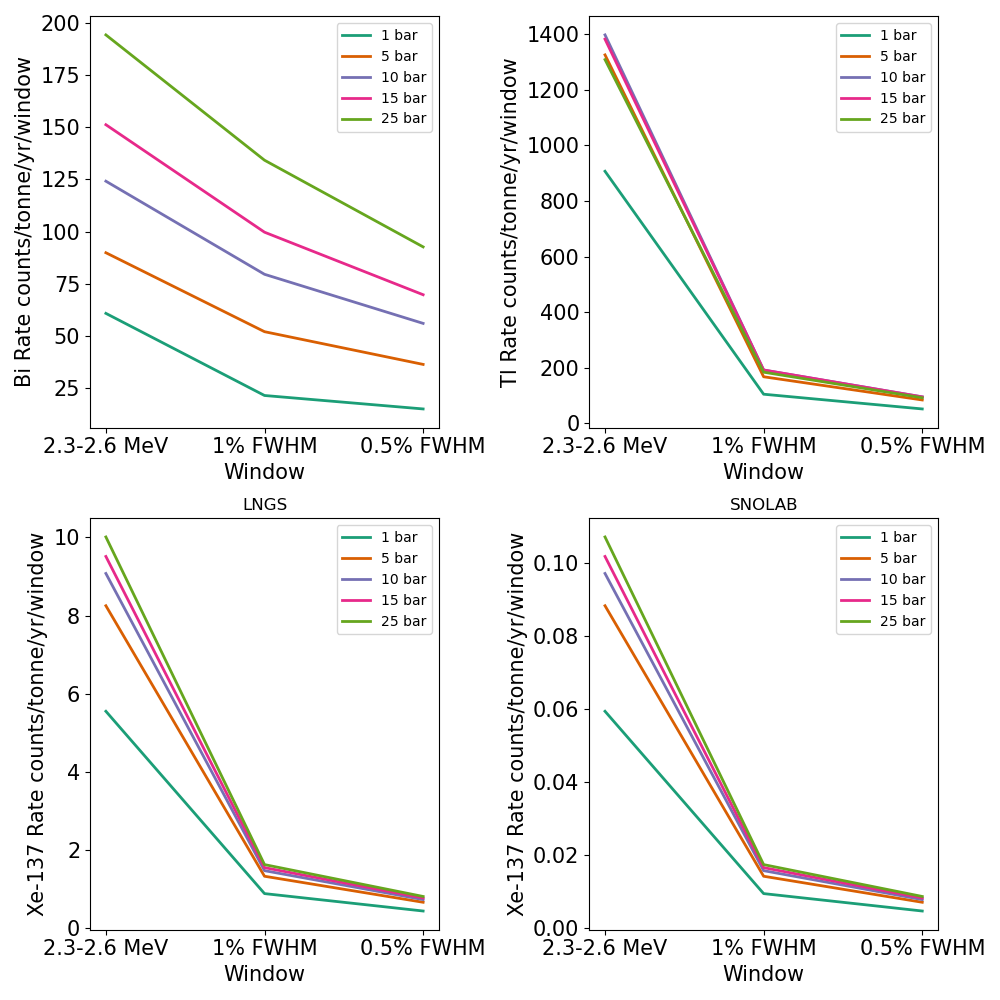

In [16]:
# Make a plot of the rate vs cuts

Bi_Rate_1bar = np.array([2015, 709, 495])/1e8
Bi_Rate_5bar = np.array([8634, 4995, 3487])/1e8
Bi_Rate_10bar = np.array([18821, 12052, 8483])/1e8
Bi_Rate_15bar = np.array([29927, 19727, 13793])/1e8
Bi_Rate_25bar = np.array([53760, 37132, 25632])/1e8
print(Bi_Rate_1bar[1], Bi_Rate_5bar[1], Bi_Rate_10bar[1], Bi_Rate_15bar[1], Bi_Rate_25bar[1])


Tl_Rate_1bar = np.array([8367, 967, 478])/1e7
Tl_Rate_5bar = np.array([35440, 4481, 2250])/1e7
Tl_Rate_10bar = np.array([58943, 8085, 4024])/1e7
Tl_Rate_15bar = np.array([76096, 10572, 5233])/1e7
Tl_Rate_25bar = np.array([100729, 14167, 7088])/1e7


single_Rate_1bar = np.array([1156725, 185034, 92157])/(2455900/0.09) # 9% corrects for full Xe-127 spectrum
single_Rate_5bar = np.array([1213898, 195925, 98018])/(1734000/0.09)
single_Rate_10bar = np.array([1189765, 193298, 96237])/(1545000/0.09)
single_Rate_15bar = np.array([1188309, 193937, 96978])/(1472509/0.09)
single_Rate_25bar = np.array([1133863, 184586, 92241])/(1335000/0.09)


fig = plt.figure(figsize=(10,10));

# The 1.20 factor corrects for the 4cm -> 12 cm copper thickness

plt.subplot(221);
plot_label = ["2.3-2.6 MeV", "1% FWHM", "0.5% FWHM"]
plt.plot(plot_label, 1.20 * 1.22e-6 * Bi_Rate_1bar * 3.15e7  *  MCu_4cm[0], linewidth = 2, label = "1 bar")
plt.plot(plot_label, 1.20 * 1.22e-6 * Bi_Rate_5bar * 3.15e7  *  MCu_4cm[1], linewidth = 2, label = "5 bar")
plt.plot(plot_label, 1.20 * 1.22e-6 * Bi_Rate_10bar * 3.15e7 *  MCu_4cm[2], linewidth = 2, label = "10 bar")
plt.plot(plot_label, 1.20 * 1.22e-6 * Bi_Rate_15bar * 3.15e7 *  MCu_4cm[3], linewidth = 2, label = "15 bar")
plt.plot(plot_label, 1.20 * 1.22e-6 * Bi_Rate_25bar * 3.15e7 *  MCu_4cm[4], linewidth = 2, label = "25 bar")
plt.xlabel("Window", fontsize=15)
plt.ylabel("Bi Rate counts/tonne/yr/window", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.tight_layout()


plt.subplot(222);
plot_label = ["2.3-2.6 MeV", "1% FWHM", "0.5% FWHM"]
plt.plot(plot_label, 1.20 * 35.94e-2 * 1.22e-6 * Tl_Rate_1bar * 3.15e7  *  MCu_4cm[0], linewidth = 2, label = "1 bar")
plt.plot(plot_label, 1.20 * 35.94e-2 * 1.22e-6 * Tl_Rate_5bar * 3.15e7  *  MCu_4cm[1], linewidth = 2, label = "5 bar")
plt.plot(plot_label, 1.20 * 35.94e-2 * 1.22e-6 * Tl_Rate_10bar * 3.15e7 *  MCu_4cm[2], linewidth = 2, label = "10 bar")
plt.plot(plot_label, 1.20 * 35.94e-2 * 1.22e-6 * Tl_Rate_15bar * 3.15e7 *  MCu_4cm[3], linewidth = 2, label = "15 bar")
plt.plot(plot_label, 1.20 * 35.94e-2 * 1.22e-6 * Tl_Rate_25bar * 3.15e7 *  MCu_4cm[4], linewidth = 2, label = "25 bar")
plt.xlabel("Window", fontsize=15)
plt.ylabel("Tl Rate counts/tonne/yr/window", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.tight_layout()


plt.subplot(223);
plot_label = ["2.3-2.6 MeV", "1% FWHM", "0.5% FWHM"]
plt.plot(plot_label, 131 * single_Rate_1bar , linewidth = 2, label = "1 bar")
plt.plot(plot_label, 131 * single_Rate_5bar , linewidth = 2, label = "5 bar")
plt.plot(plot_label, 131 * single_Rate_10bar, linewidth = 2, label = "10 bar")
plt.plot(plot_label, 131 * single_Rate_15bar, linewidth = 2, label = "15 bar")
plt.plot(plot_label, 131 * single_Rate_25bar, linewidth = 2, label = "25 bar")
plt.xlabel("Window", fontsize=15)
plt.ylabel("Xe-137 Rate counts/tonne/yr/window", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.title("LNGS")
plt.tight_layout()

plt.subplot(224);
plot_label = ["2.3-2.6 MeV", "1% FWHM", "0.5% FWHM"]
plt.plot(plot_label, 1.4 * single_Rate_1bar , linewidth = 2, label = "1 bar")
plt.plot(plot_label, 1.4 * single_Rate_5bar , linewidth = 2, label = "5 bar")
plt.plot(plot_label, 1.4 * single_Rate_10bar, linewidth = 2, label = "10 bar")
plt.plot(plot_label, 1.4 * single_Rate_15bar, linewidth = 2, label = "15 bar")
plt.plot(plot_label, 1.4 * single_Rate_25bar, linewidth = 2, label = "25 bar")
plt.xlabel("Window", fontsize=15)
plt.ylabel("Xe-137 Rate counts/tonne/yr/window", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.title("SNOLAB")
plt.legend()
plt.tight_layout()

plt.savefig(f"plots/Technote/RatesvsWindow.pdf")

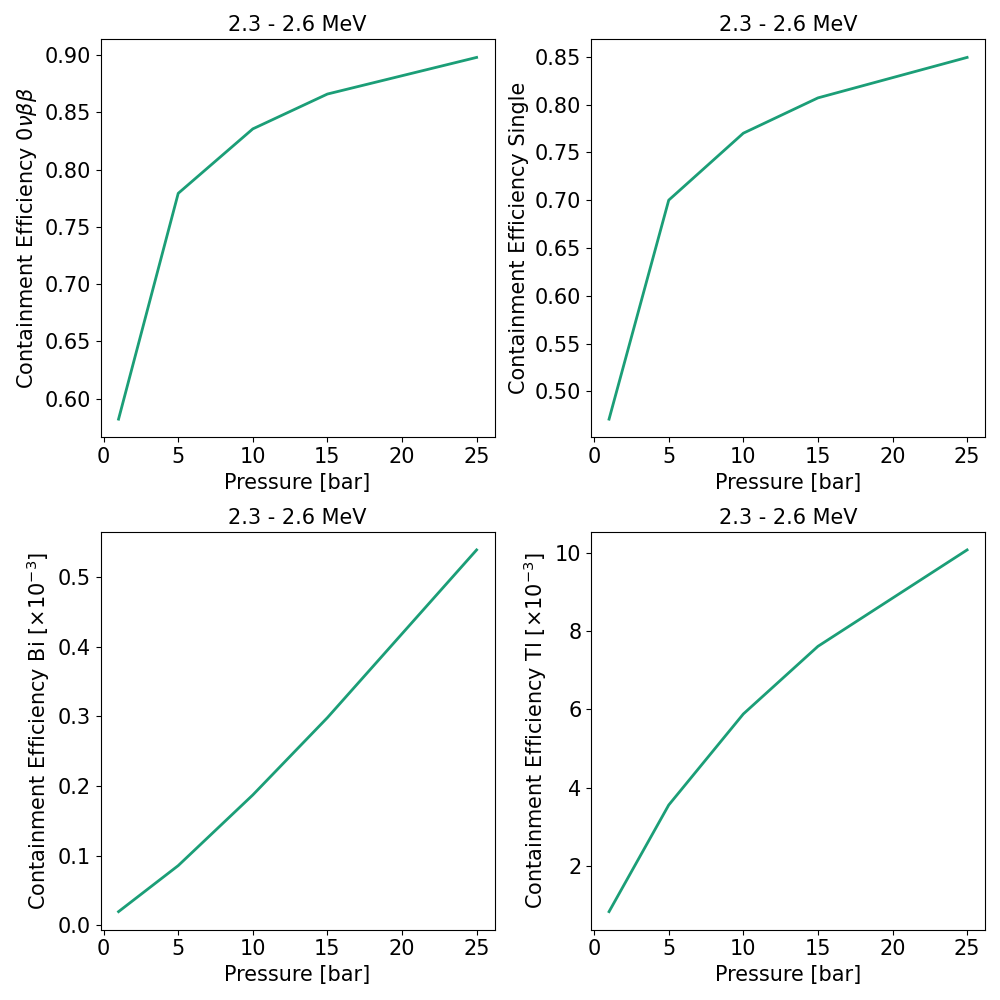

In [6]:
# Plot the interaction rates

pressures = [1, 5, 10, 15, 25]
N_gen_signal = np.array([366000, 264000, 243000, 234000, 222000])
N_gen_single = np.array([2455900, 1734000, 1545000, 1472509, 1335000])
N_gen_Bi = np.array([29970000000, 6297900000, 3000000000, 1160960000, 1051920000])
N_gen_Tl = np.array([2067930000, 510000000, 259998000, 210000000, 150000000])

N_int_signal = np.array([213073, 205721, 203028, 202622, 199327])
N_int_single = np.array([1156725, 1213898, 1189765, 1188309, 1133863])
N_int_Bi = np.array([582493, 539209, 561505, 346255, 567325])
N_int_Tl = np.array([1726116, 1814424, 1529381, 1597985, 1510776])


fig = plt.figure(figsize=(10,10));

plt.subplot(221);
plt.plot(pressures, N_int_signal/N_gen_signal, linewidth = 2)
plt.xlabel("Pressure [bar]", fontsize=15)
plt.ylabel(r"Containment Efficiency $0\nu\beta\beta$", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.title("2.3 - 2.6 MeV", fontsize = 15)
plt.tight_layout()


plt.subplot(222);
plt.plot(pressures, N_int_single/N_gen_single, linewidth = 2)
plt.xlabel("Pressure [bar]", fontsize=15)
plt.ylabel(r"Containment Efficiency Single", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.title("2.3 - 2.6 MeV", fontsize = 15)
plt.tight_layout()


plt.subplot(223);
plt.plot(pressures, 1000*N_int_Bi/N_gen_Bi, linewidth = 2)
plt.xlabel("Pressure [bar]", fontsize=15)
plt.ylabel(r"Containment Efficiency Bi [$\times$10$^{-3}$]", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.title("2.3 - 2.6 MeV", fontsize = 15)
plt.tight_layout()

plt.subplot(224);
plt.plot(pressures, 1000*N_int_Tl/N_gen_Tl, linewidth = 2)
plt.xlabel("Pressure [bar]", fontsize=15)
plt.ylabel(r"Containment Efficiency Tl [$\times$10$^{-3}$]", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.title("2.3 - 2.6 MeV", fontsize = 15)
plt.tight_layout()

plt.savefig(f"plots/Technote/ContainmentRates.pdf")

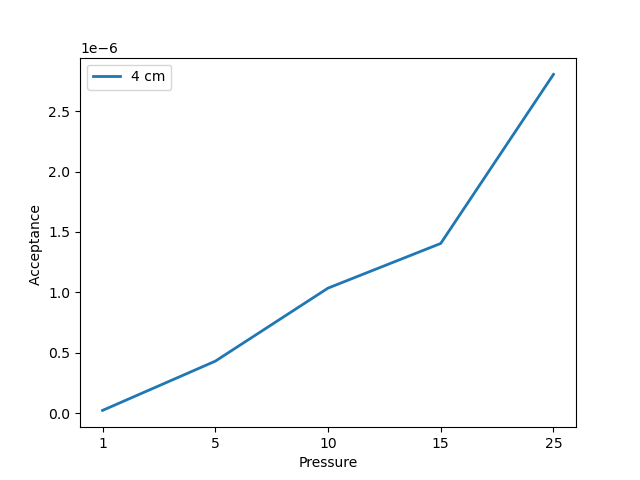

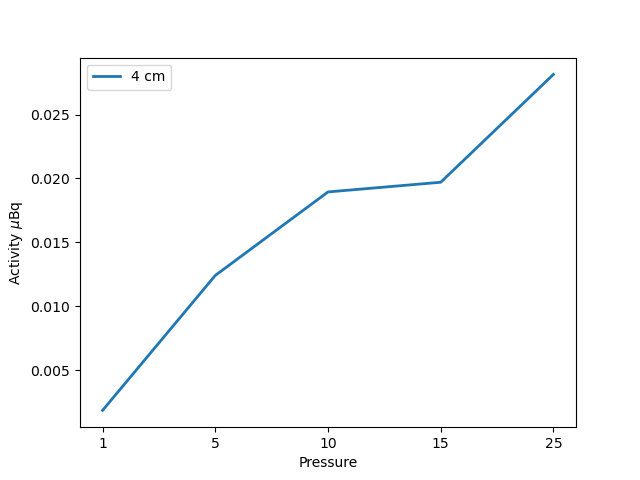

In [ ]:
# Make a rough plot of the acceptance factor at 4cm 


plt.figure()

eff = [1e-3, 5e-3, 5e-3, 5e-3, 5e-3]

pressures_label = ["1", "5", "10", "15", "25"]
plt.plot(pressures_label, eff * Int_Win_Bi_4cm/10e6, linewidth = 2, label = "4 cm")
plt.xlabel("Pressure")
plt.ylabel("Acceptance ")
plt.legend()



plt.figure()

eff = [1e-3, 5e-3, 5e-3, 5e-3, 5e-3]

pressures_label = ["1", "5", "10", "15", "25"]
plt.plot(pressures_label, 1.28 * MCu_4cm * eff * Int_Win_Bi_4cm/10e6, linewidth = 2, label = "4 cm")
plt.xlabel("Pressure")
plt.ylabel(r"Activity $\mu$Bq")
plt.legend()

In [ ]:
# Calc Det Mass
def CalcDetMass(Pressure, M):

    density = 5.987*Pressure
    return np.cbrt((4 * M) / (np.pi * density))

print("Enriched")
print("1  bar:", CalcDetMass(1,  1000/0.9))
print("5  bar:", CalcDetMass(5,  1000/0.9))
print("10 bar:", CalcDetMass(10, 1000/0.9))
print("15 bar:", CalcDetMass(15, 1000/0.9))
print("25 bar:", CalcDetMass(25, 1000/0.9))

print("\nNatural")
print("1  bar:", CalcDetMass(1,  1000/0.09))
print("5  bar:", CalcDetMass(5,  1000/0.09))
print("10 bar:", CalcDetMass(10, 1000/0.09))
print("15 bar:", CalcDetMass(15, 1000/0.09))
print("25 bar:", CalcDetMass(25, 1000/0.09))

Enriched
1  bar: 6.182338549679528
5  bar: 3.6154535165800286
10 bar: 2.869587357780632
15 bar: 2.5068154576114123
25 bar: 2.1143300428328176

Natural
1  bar: 13.31944463695098
5  bar: 7.789258476317778
10 bar: 6.182338549679528
15 bar: 5.400770183386178
25 bar: 4.555185990455621
